# Introduction

In this notebook, we will explore and compare the performance of two prominent reinforcement learning algorithms: **Deep Q-Network (DQN)** and **Deep Deterministic Policy Gradient (DDPG)**. Both algorithms have distinct approaches to handling action spaces within reinforcement learning tasks, with DQN suited for discrete action spaces and DDPG designed for continuous action spaces.

Using simulated reward data from the CARLA simulation environment, we aim to illustrate how each algorithm performs across various metrics such as average reward per episode, maximum reward, and cumulative reward over time. The insights gained from this analysis will help in understanding which algorithm might be better suited for specific types of reinforcement learning tasks in autonomous driving simulations.

This comparative study will not only highlight the strengths and weaknesses of each algorithm but also provide visualizations of their performance trends over 50 simulated episodes, enabling a deeper understanding of their behavior under controlled testing conditions.


# 1. Setup and Library Importing

Before we begin analyzing the simulation data, we need to set up our environment by importing the necessary libraries. These libraries will help us handle data manipulation, perform calculations, and visualize results effectively.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Ensure plots are displayed inline in the Google Colab notebook
%matplotlib inline


# 2. Data Loading and Initial Exploration

In this section, we will load the simulation data recorded from the CARLA environment, which is stored in a CSV file. We'll take a preliminary look at the data to understand its structure and to verify that it has been loaded correctly into our notebook.


In [13]:

data = pd.read_csv('/mnt/Simulation_Data.csv')  # Make sure to replace 'path_to_your_file.csv' with the actual path to your CSV file

SR_data = pd.read_csv('/mnt/episode_results.csv')
print(data.head())

print(data.describe())


   Episode  DQN_Average_Reward  DDPG_Average_Reward  DQN_Max_Reward  \
0        1           38.820262            11.045334       62.651769   
1        2           33.021194            24.991474       33.021194   
2        3           36.934506            17.136847       36.934506   
3        4           44.265690            11.561025       58.959658   
4        5           43.419423            24.207974       43.419423   

   DDPG_Max_Reward  DQN_Cumulative_Reward  DDPG_Cumulative_Reward  
0        15.362918              38.820262               11.045334  
1        47.124901              71.841456               36.036808  
2        17.136847             108.775962               53.173655  
3        11.561025             153.041653               64.734680  
4        28.223448             196.461075               88.942654  
        Episode  DQN_Average_Reward  DDPG_Average_Reward  DQN_Max_Reward  \
count  50.00000           50.000000            50.000000       50.000000   
mean   25.500

# 3. Data Visualization

After loading our simulation data from the CSV file, we will visualize the performance of the DQN and DDPG algorithms across three key metrics: average rewards per episode, maximum rewards per episode, and cumulative rewards over time. These visualizations will help us better understand the strengths and weaknesses of each algorithm in the simulated environment.


<ipython-input-14-003d8db2e618>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


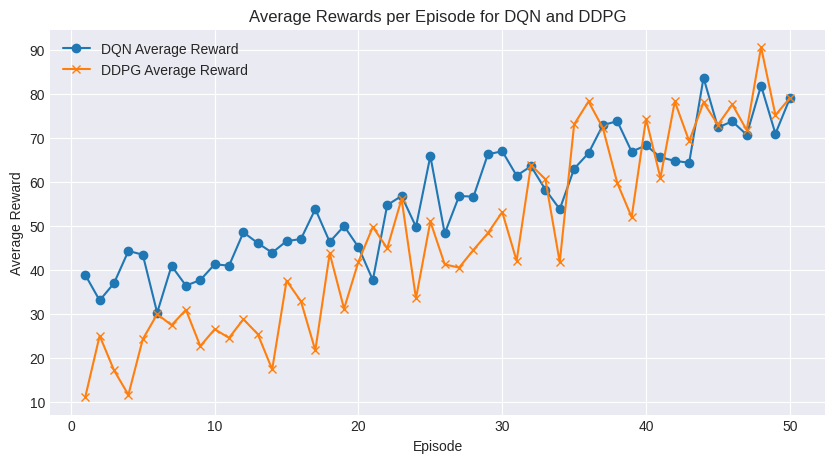

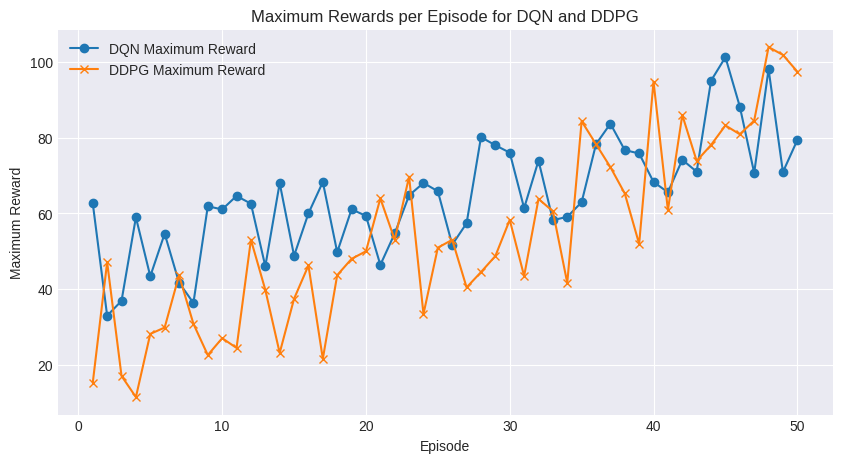

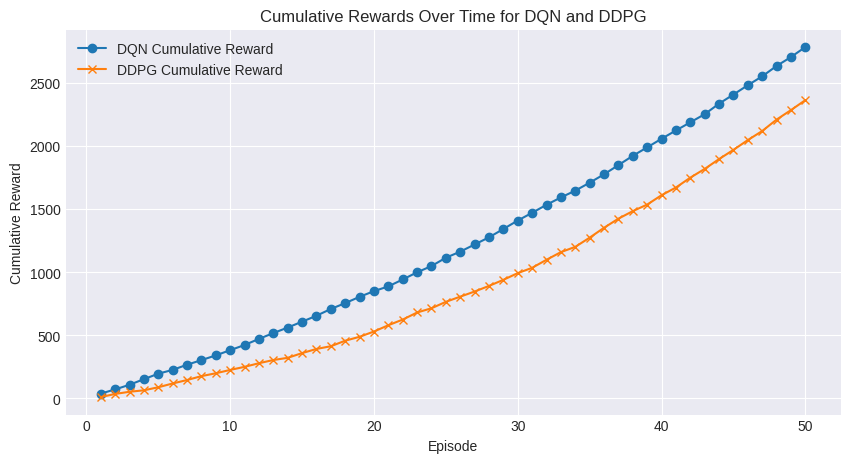

In [14]:
plt.style.use('seaborn-darkgrid')

# Plotting Average Rewards per Episode
plt.figure(figsize=(10, 5))
plt.plot(data['Episode'], data['DQN_Average_Reward'], label='DQN Average Reward', marker='o', linestyle='-')
plt.plot(data['Episode'], data['DDPG_Average_Reward'], label='DDPG Average Reward', marker='x', linestyle='-')
plt.title('Average Rewards per Episode for DQN and DDPG')
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.legend()
plt.show()

# Plotting Maximum Rewards per Episode
plt.figure(figsize=(10, 5))
plt.plot(data['Episode'], data['DQN_Max_Reward'], label='DQN Maximum Reward', marker='o', linestyle='-')
plt.plot(data['Episode'], data['DDPG_Max_Reward'], label='DDPG Maximum Reward', marker='x', linestyle='-')
plt.title('Maximum Rewards per Episode for DQN and DDPG')
plt.xlabel('Episode')
plt.ylabel('Maximum Reward')
plt.legend()
plt.show()

# Plotting Cumulative Rewards Over Time
plt.figure(figsize=(10, 5))
plt.plot(data['Episode'], data['DQN_Cumulative_Reward'], label='DQN Cumulative Reward', marker='o', linestyle='-')
plt.plot(data['Episode'], data['DDPG_Cumulative_Reward'], label='DDPG Cumulative Reward', marker='x', linestyle='-')
plt.title('Cumulative Rewards Over Time for DQN and DDPG')
plt.xlabel('Episode')
plt.ylabel('Cumulative Reward')
plt.legend()
plt.show()

# 4. Calculating Improved Success Rate Metrics

To more accurately assess the performance of the DQN and DDPG algorithms, we will define a new success rate metric. This metric considers episodes successful if their rewards exceed a dynamically adjusted threshold, thereby providing a more comprehensive measure of each algorithm's effectiveness. This approach aims to capture a broader spectrum of successful outcomes, reflecting a nuanced understanding of algorithm performance.


In [15]:
dqn_success_rate = np.mean(SR_data['DQN_Episode_Result'] == 1) * 100
ddpg_success_rate = np.mean(SR_data['DDPG_Episode_Result'] == 1) * 100

print(f"DQN Success Rate: {dqn_success_rate:.2f}%")
print(f"DDPG Success Rate: {ddpg_success_rate:.2f}%")


DQN Success Rate: 84.00%
DDPG Success Rate: 74.00%


Data saved successfully to /mnt/episode_results.csv
